In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
########## DECLARING VARIABLES ###########
u = 2 * np.random.rand(50) - 1
n = 50
X = [i for i in range(1, n+1)]
Y = [i + u[i-1] for i in range(1, n+1)]
##########################################

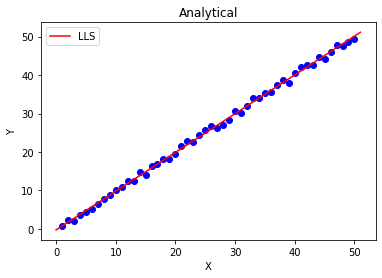

In [3]:
################ PART 1 ##################
num = 0
den = 0
for i in range(n):
    num = num + (X[i] - np.mean(X)) * (Y[i] - np.mean(Y))
    den = den + np.power(X[i] - np.mean(X), 2)
    
x = np.linspace(0, n+1, 1000)
y = (np.mean(Y) - ((num / den) * np.mean(X)) + (num / den)*x)

plt.plot(x, y, color='r', label='LLS')
plt.scatter(X, Y, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Analytical")
plt.legend()
plt.show()
##########################################

In [4]:
x = np.array(X)
y = np.array(Y)
w = np.array([0, 1])
lr = 0.01
epochs = 10

In [5]:
def our_sum(x, y, w):
    sum = 0
    for i in range(50):
        sum += (y[i] - (w[0] + w[1]*x[i]))**2
    return sum


In [6]:
def gradient(x, y, w):
    g = np.zeros(2)
    for i in range(n):
        g[0] += (y[i]-w[0]-w[1]*x[i])
        g[1] += (y[i]-w[0]-w[1]*x[i])*x[i]
    return -2*g

In [7]:
def update_weights(epochs, lr, x, y, w): 
    for i in range(epochs):
        g = gradient(x, y, w)
        new_w = w - lr*g
    return new_w

In [8]:
def get_new_y(x, y, new_w):
    new_y = np.zeros(n)
    for i in range(n):
        new_y[i] = new_w[0] + new_w[1]*x[i]
    return new_y

In [9]:
new_w = update_weights(epochs, lr, x, y, w)
new_y = get_new_y(x, y, new_w)

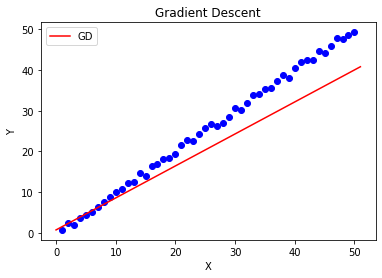

In [10]:

x = np.linspace(0, n+1, 50)

plt.plot(x, new_y, color='r', label='GD')
plt.scatter(X, Y, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Gradient Descent")
plt.legend()
plt.show()